### Python 中的模型诊断(SKLEARN)

该数据集包含四个变量： `admit`、 `gre`、 `gpa` 与 `prestige`

* `admit` 是一个二元变量，它表明一个候选人是否被 UCLA 录取，录取=1，不被录取=0 。
* `gre` 代表 GRE 成绩，GRE 指的是研究生入学考试。
* `gpa` 代表平均学分绩点 （Grade Point Average）。
* `prestige` 代表申请人母校（此次申请之前申请人曾就读的学校）的声誉，其中1代表最高（声誉最高），4代表最低（没有声誉）。

首先，让我们导入必要的库和数据。

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

np.random.seed(42)

df = pd.read_csv("admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [11]:
y = df["admit"]
df[["prestige_1","prestige_2","prestige_3","prestige_4"]] = pd.get_dummies(df["prestige"])
X = df[["gre","gpa","prestige_1","prestige_2","prestige_3"]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [12]:
log_mod = LogisticRegression()
log_mod.fit(X_train,y_train)
y_preds = log_mod.predict(X_test)

#精确率
print(precision_score(y_test,y_preds))

#召回率
print(recall_score(y_test,y_preds))

#准确率
print(accuracy_score(y_test,y_preds))

#混淆矩阵
print(confusion_matrix(y_test,y_preds))

1.0
0.0833333333333
0.725
[[56  0]
 [22  2]]


In [13]:
print(classification_report(y_test, y_preds))

             precision    recall  f1-score   support

          0       0.72      1.00      0.84        56
          1       1.00      0.08      0.15        24

avg / total       0.80      0.72      0.63        80



D:\Users\Alexander\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
D:\Users\Alexander\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


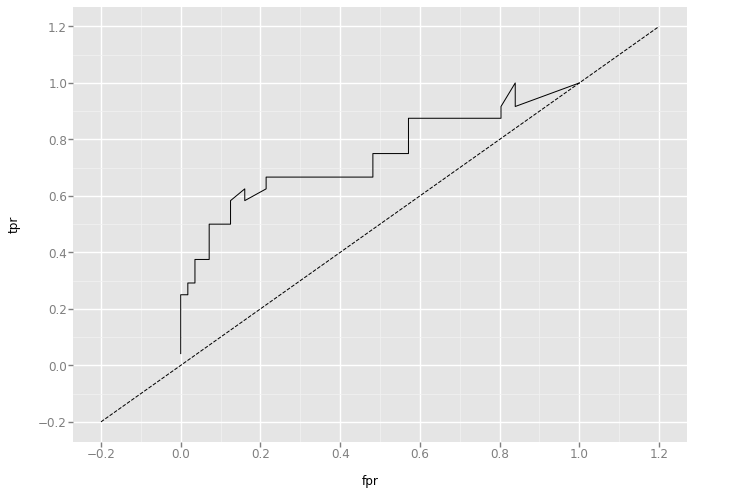

<ggplot: (-9223371889801516656)>

In [14]:
### Unless you install the ggplot library in the workspace, you will 
### get an error when running this code!

from ggplot import *
from sklearn.metrics import roc_curve, auc
%matplotlib inline

preds = log_mod.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')